In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/kaggle/input/artisian-test-email-campaign/email_campaigns.pkl'
data = pd.read_pickle(file_path)

In [2]:
flattened_data_corrected = []
for entry in data:
    for origin_key, records in entry.items():
        for record in records:
            if isinstance(record, dict):
                record['origin_key'] = origin_key
                flattened_data_corrected.append(record)

df_corrected = pd.DataFrame(flattened_data_corrected)

df_corrected.head()

,subject,body,opened,meeting link clicked,responded,origin_key,meeting_link_clicked
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,example1,NaN
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,example1,NaN
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,example1,NaN
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,example1,NaN
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,example1,NaN


In [3]:
# column name discrepency

case1 = df_corrected[df_corrected['meeting link clicked'].notnull() & df_corrected['meeting_link_clicked'].isnull()]

# Cases where 'meeting_link_clicked' is not null but 'meeting link clicked' is null
case2 = df_corrected[df_corrected['meeting link clicked'].isnull() & df_corrected['meeting_link_clicked'].notnull()]

case1_count = case1.shape[0]
case2_count = case2.shape[0]

print(case1_count, case2_count)


138 16


In [4]:
case2_inspection = case2[['meeting link clicked', 'meeting_link_clicked']]

case2_inspection

,meeting link clicked,meeting_link_clicked
20,NaN,False
21,NaN,False
22,NaN,True
26,NaN,False
27,NaN,False
28,NaN,True
70,NaN,False
71,NaN,False
72,NaN,True
110,NaN,False


In [5]:
df_corrected['meeting link clicked'].fillna(df_corrected['meeting_link_clicked'], inplace=True)

# Dropping the 'meeting_link_clicked' column as it is now merged
df_merged = df_corrected.drop(columns=['meeting_link_clicked'])

df_merged.head()

,subject,body,opened,meeting link clicked,responded,origin_key
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,example1
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,example1
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,example1
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,example1
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,example1


In [6]:
# Checking for missing values and getting a basic overview of the data
df_overview = df_merged.describe(include='all')
missing_values = df_merged.isnull().sum()
print(df_overview, missing_values)

                                                  subject  \
count                                                 154   
unique                                                154   
top     🚀 Propel Your Marketing ROI with Advanced Anal...   
freq                                                    1   

                                                     body opened  \
count                                                 154    154   
unique                                                154      2   
top     Hey [Recipient's Name],\n\nReady to see your m...   True   
freq                                                    1    114   

       meeting link clicked responded origin_key  
count                   154       154        154  
unique                    2         2         17  
top                   False     False   example1  
freq                    108       146         81   subject                 0
body                    0
opened                  0
meeting link clicked

In [7]:
# Calculating descriptive statistics for boolean columns
descriptive_stats = df_merged[['opened', 'meeting link clicked', 'responded']].apply(pd.Series.value_counts)
descriptive_stats['opened_percentage'] = descriptive_stats['opened'] / descriptive_stats['opened'].sum() * 100
descriptive_stats['click_percentage'] = descriptive_stats['meeting link clicked'] / descriptive_stats['meeting link clicked'].sum() * 100
descriptive_stats['response_percentage'] = descriptive_stats['responded'] / descriptive_stats['responded'].sum() * 100

descriptive_stats

,opened,meeting link clicked,responded,opened_percentage,click_percentage,response_percentage
False,40,108,146,25.974026,70.12987,94.805195
True,114,46,8,74.025974,29.87013,5.194805


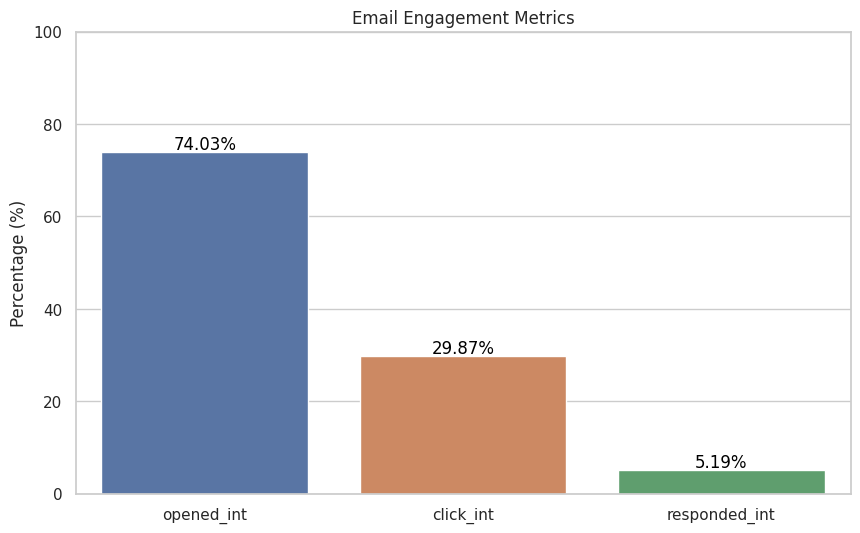

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df_merged['opened_int'] = df_merged['opened'].astype(int)
df_merged['click_int'] = df_merged['meeting link clicked'].astype(int)
df_merged['responded_int'] = df_merged['responded'].astype(int)

# Recalculating descriptive statistics for integer columns
descriptive_stats_int = df_merged[['opened_int', 'click_int', 'responded_int']].mean() * 100

# Creating a bar plot for Open Rates, Click-Through Rates, and Conversion Rates
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(x=descriptive_stats_int.index, y=descriptive_stats_int.values)
ax.set_title('Email Engagement Metrics')
ax.set_ylabel('Percentage (%)')
ax.set_ylim(0, 100)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


# Insights and Patterns:

**From the analysis and visualizations, we can draw the following insights:**

* **High Open Rate:** The open rate is quite high, indicating that the subjects of the emails are effectively capturing the recipients' attention.
* **Moderate Click-Through Rate:** While not as high as the open rate, the click-through rate is still substantial, suggesting that a significant portion of the recipients who open the emails are interested enough to click on the links.
* **Low Conversion Rate:** The conversion rate is relatively low compared to the open and click-through rates. This could be due to various factors such as the nature of the call to action, the content of the email, or the relevance of the links to the recipients.

# Topic Analysis and Insights:


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

combined_text = df_merged['subject'] + " " + df_merged['body']

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_vect = vectorizer.fit_transform(combined_text)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_vect)

def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d" % (topic_idx)] = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    return topic_dict

topics = display_topics(lda, vectorizer.get_feature_names_out(), 10)
topics

{'Topic 0': 'let financial time legal company strategy email hello hr ve',
 'Topic 1': 'hr retention marketing talent employee warm help company hello analytics',
 'Topic 2': 'legal best business ready solutions hr let chat minute secure',
 'Topic 3': 'marketing analytics data let insights quick best company roi services',
 'Topic 4': 'marketing data analytics let company time best potential noticed previous'}

* **Diverse Content Strategy:** Your email campaigns cover a range of topics from HR-related issues to marketing analytics and business solutions, indicating a diverse content strategy.
* **Target Audience Segmentation:** Different topics suggest that the emails might be targeted at various segments, such as HR professionals, legal experts, and marketing strategists.
* **Emphasis on Data and Analytics:** A recurring theme across multiple topics is the focus on analytics and data, highlighting its importance in your communication.

In [10]:
def get_top_ngrams(corpus, ngram_range=(2,2), n=10):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_ngrams(combined_text, ngram_range=(2, 2), n=10)
top_trigrams = get_top_ngrams(combined_text, ngram_range=(3, 3), n=10)

top_bigrams, top_trigrams


([('meeting link', 156),
  ('marketing analytics', 58),
  ('hi recipient', 48),
  ('link best', 45),
  ('hello recipient', 40),
  ('hey recipient', 35),
  ('recipient noticed', 32),
  ('warm regards', 27),
  ('analytics services', 25),
  ('data driven', 23)],
 [('meeting link best', 45),
  ('meeting link cheers', 20),
  ('marketing analytics services', 19),
  ('hi recipient noticed', 19),
  ('meeting link warm', 16),
  ('link warm regards', 16),
  ('link meeting link', 13),
  ('chat meeting link', 12),
  ('talk meeting link', 10),
  ('analytics hey recipient', 9)])

# Top Bigrams:
* **"Meeting Link"** (156 occurrences): This phrase's high frequency suggests a strong call-to-action focus in your emails, encouraging recipients to click on a meeting link.
* **"Marketing Analytics"** (58 occurrences): A recurring theme, likely indicating a focus on marketing analytics in the content.
* **"Hi/Hello/Hey Recipient"** (combined 123 occurrences): These bigrams show a consistent, informal greeting style used in the emails.
* **"Warm Regards"** (27 occurrences): A common sign-off phrase, indicating a friendly and professional tone in closing the emails.
* **"Analytics Services" and "Data Driven":** These phrases suggest a focus on analytics-based services and data-driven approaches.

# Top Trigrams:
* **"Meeting Link Best/Cheers/Warm"** (combined 77 occurrences): These trigrams, combined with "link warm regards", indicate a pattern in how meeting links are presented and the sign-offs that follow.
* **"Marketing Analytics Services"** (19 occurrences): This reinforces the focus on offering services in marketing analytics.
* **"Hi/Hello Recipient Noticed"** (combined 28 occurrences): Indicates personalized attention in the email content, possibly acknowledging or responding to recipient behavior.
* **"Chat/Talk Meeting Link":** Implies an invitation to discuss or engage further, encouraging direct communication.

* **Strong Call-to-Action:** The frequent mention of "meeting link" in various contexts suggests a clear call-to-action in the emails, prompting recipients to engage further.
* **Content Focus:** The emphasis on "marketing analytics" and related services indicates a specific focus of the email content, likely appealing to an audience interested in data-driven marketing solutions.
* **Tone and Style:** The use of informal greetings and friendly sign-offs like "warm regards" points to a conversational and approachable tone in the emails.

In [11]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.3 MB/s eta 0:00:0000:0100:01


In [12]:
import textstat

df_merged['flesch_reading_ease'] = df_merged['body'].apply(textstat.flesch_reading_ease)

flesch_scores = df_merged['flesch_reading_ease'].describe()
flesch_scores


count    154.000000
mean      66.129156
std       10.355504
min       44.410000
25%       60.035000
50%       67.350000
75%       70.905000
max       94.860000
Name: flesch_reading_ease, dtype: float64

# Text Complexity Analysis Insights:
* **Average Score (Mean: 66.13):** The average score is in the standard readability range, suggesting that the emails are reasonably easy to understand for the average reader. This is a good sign, as it indicates that the content is accessible to a broad audience.
* **Score Range:** With scores ranging from a minimum of 44.41 to a maximum of 94.86, there is a wide variation in the complexity of individual emails. The lower end suggests some emails are more complex and might require a higher reading level, while the higher end indicates very easy-to-read content.
* **Standard Deviation (Std: 10.36):** The standard deviation reflects some variability in the readability across different emails. This variation might be due to the different subjects and purposes of the emails.

* **Appropriately Tailored Content:** The majority of your emails are within a readability range that is considered standard and appropriate for a wide audience.
* **Diverse Content Complexity:** The variation in scores suggests that some emails are more complex than others, which could be intentional based on the target audience or the nature of the content.
* **Potential for Refinement:** For emails falling in the lower quartile of readability, consider simplifying the language or structure to make them more accessible, especially if they are intended for a general audience.

In [13]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english')
text_tfidf = tfidf_vect.fit_transform(combined_text)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(text_tfidf)

df_merged['cluster'] = clusters

cluster_analysis = df_merged.groupby('cluster').agg({
    'opened': 'mean',
    'meeting link clicked': 'mean',
    'responded': 'mean'
}).reset_index()

cluster_analysis


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,opened,meeting link clicked,responded
0,0,0.8125,0.21875,0.0625
1,1,0.68,0.32,0.04
2,2,0.734694,0.285714,0.040816
3,3,0.8,0.44,0.08
4,4,0.652174,0.26087,0.043478


# Cluster 3:

* **Opened Rate:** 80%
* **Meeting Link Clicked:** 44%
* **Responded:** 8%
* **Insight:** This cluster is the most successful, with high open and click-through rates, and the highest response rate. The emails in this cluster likely have both engaging subjects and compelling content.
* **Best Practices from High-Performing Clusters:** Cluster 3, with the highest engagement metrics, could be studied in detail to identify best practices that can be applied to other clusters.

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

def summarize_text(text, top_n=3):
    """
    Summarize text by extracting top n sentences based on TF-IDF scores.
    """
    if not text:
        return ""
    
    sentences = text.split(". ")
    vectorizer = CountVectorizer(stop_words='english').fit(sentences)
    transformer = TfidfTransformer()
    
    tfidf = transformer.fit_transform(vectorizer.transform(sentences))
    
    sorted_sentences = [sentence for sentence, score in sorted(zip(sentences, tfidf.toarray().sum(axis=1)), key=lambda x: x[1], reverse=True)]
    return " ".join(sorted_sentences[:top_n])

sample_summaries = df_merged['body'].head(5).apply(summarize_text)
sample_summaries


0    Hey [Recipient's Name],\n\nReady to see your m...
1    With your goals in mind, our marketing analyti...
2    Our tailored Marketing Analytics can peel back...
3    Imagine the competitive edge you could gain wi...
4    Are you leveraging your data to its full poten...
Name: body, dtype: object

* **Engagement and Curiosity:** The emails generally start with engaging hooks that aim to build curiosity and interest, such as asking a question or presenting a thought-provoking scenario.
* **Customization and Personalization:** There is an emphasis on tailored solutions and personalization, suggesting that the services or products offered are adaptable to the specific needs of the recipient.
* **Competitive Edge and Data Utilization:** The recurring themes involve gaining a competitive advantage and making the most out of da

# Model building

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline

top_subject_keywords = ['marketing', 'analytics', 'data', 'services', 'strategy']
top_body_keywords = ['customer', 'engagement', 'growth', 'performance', 'analysis']
for keyword in top_subject_keywords:
    column_name = f'subject_contains_{keyword}'
    df_merged[column_name] = df_merged['subject'].str.contains(keyword, case=False, na=False)

for keyword in top_body_keywords:
    column_name = f'body_contains_{keyword}'
    df_merged[column_name] = df_merged['body'].str.contains(keyword, case=False, na=False)
df_merged['subject_length'] = df_merged['subject'].apply(len)

features = df_merged[[f'subject_contains_{keyword}' for keyword in top_subject_keywords] +
                     [f'body_contains_{keyword}' for keyword in top_body_keywords] +
                     ['subject_length']]
features.fillna(0, inplace=True)  

target = df_merged['opened_int']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

accuracy, report, conf_matrix


/tmp/ipykernel_47/3907149024.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)  # Handling missing values by filling with 0


(0.6382978723404256,
 '              precision    recall  f1-score   support\n\n           0       0.21      0.33      0.26         9\n           1       0.82      0.71      0.76        38\n\n    accuracy                           0.64        47\n   macro avg       0.52      0.52      0.51        47\nweighted avg       0.70      0.64      0.66        47\n',
 array([[ 3,  6],
        [11, 27]]))

# Model Evaluation Summary:

Accuracy: The model has an accuracy of approximately 63.83%. This indicates that around 64% of the email engagement predictions (opened or not opened) made by the model are correct.

**Confusion Matrix:**

True Negatives (Correctly predicted not opened): 3
False Positives (Incorrectly predicted as opened): 6
False Negatives (Incorrectly predicted as not opened): 11
True Positives (Correctly predicted as opened): 27

**Insights and Recommendations:**

Class Imbalance Impact: The model performs better at predicting opened emails than not opened ones, which could be due to a class imbalance (more opened emails than not opened in the training data).

Potential for Overfitting: The model might be overfitting to the majority class. Techniques like adjusting class weights, using SMOTE for oversampling the minority class, or even collecting more balanced data could help.

Feature Relevance: It's possible that the features used might not be sufficiently predictive. Exploring additional or different features, especially from the email content, could improve performance.

Model Complexity: Experimenting with different models or tuning the hyperparameters of the current model might yield better results.
Evaluation Metrics: Given the class imbalance, consider focusing on metrics like the F1-score or AUC-ROC instead of accuracy alone.
